# Pre-Processing

### Importing Libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

In [2]:
dataset = pd.read_csv('dataset/Telco-Customer-Churn.csv')
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


### Dataset Details, Null Values, and Duplicate Identifications

In [3]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#identifying the datatypes of each column
print(dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
#We have noticed that the TotalCharges column is of type object. We will convert it to numeric after removing the empty strings and string with just one space

replacement_value = '0.00'
pattern = r'^\s*$'

#replaces empty and space strings with 0.00
dataset['TotalCharges']  = dataset['TotalCharges'].replace(pattern, replacement_value, regex=True)

#parses the column to numeric
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

In [7]:
print(dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [8]:
#identifying if any of the features have duplicate values
dataset.duplicated() 

print('Total number of duplicate values: ', dataset.duplicated().sum())

Total number of duplicate values:  0


### Feature Selection Based on Simple Domain Expertise

In [9]:
selected_dataset = dataset.drop(['customerID', 'gender','MonthlyCharges'],axis=1)

In [10]:
selected_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


### Exploratory Data Analysis

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

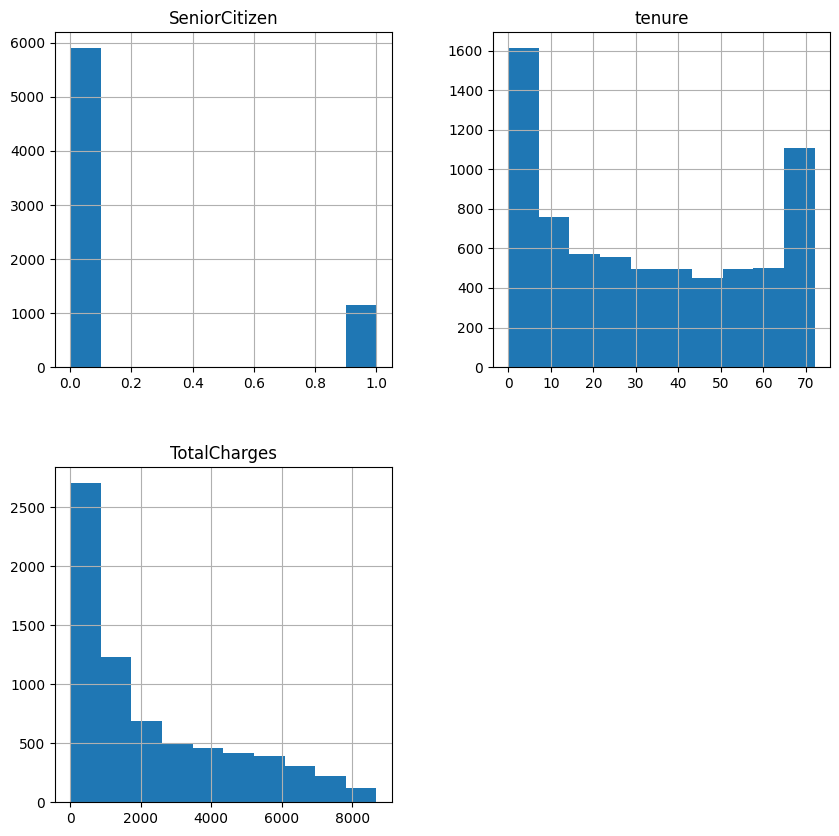

In [11]:
#view the histogram per each numerical column
selected_dataset.hist(figsize=(10,10))

In [12]:
categ_columns = []
for col in selected_dataset.columns:
	if dataset[col].nunique()<10:
		categ_columns.append(col)

print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


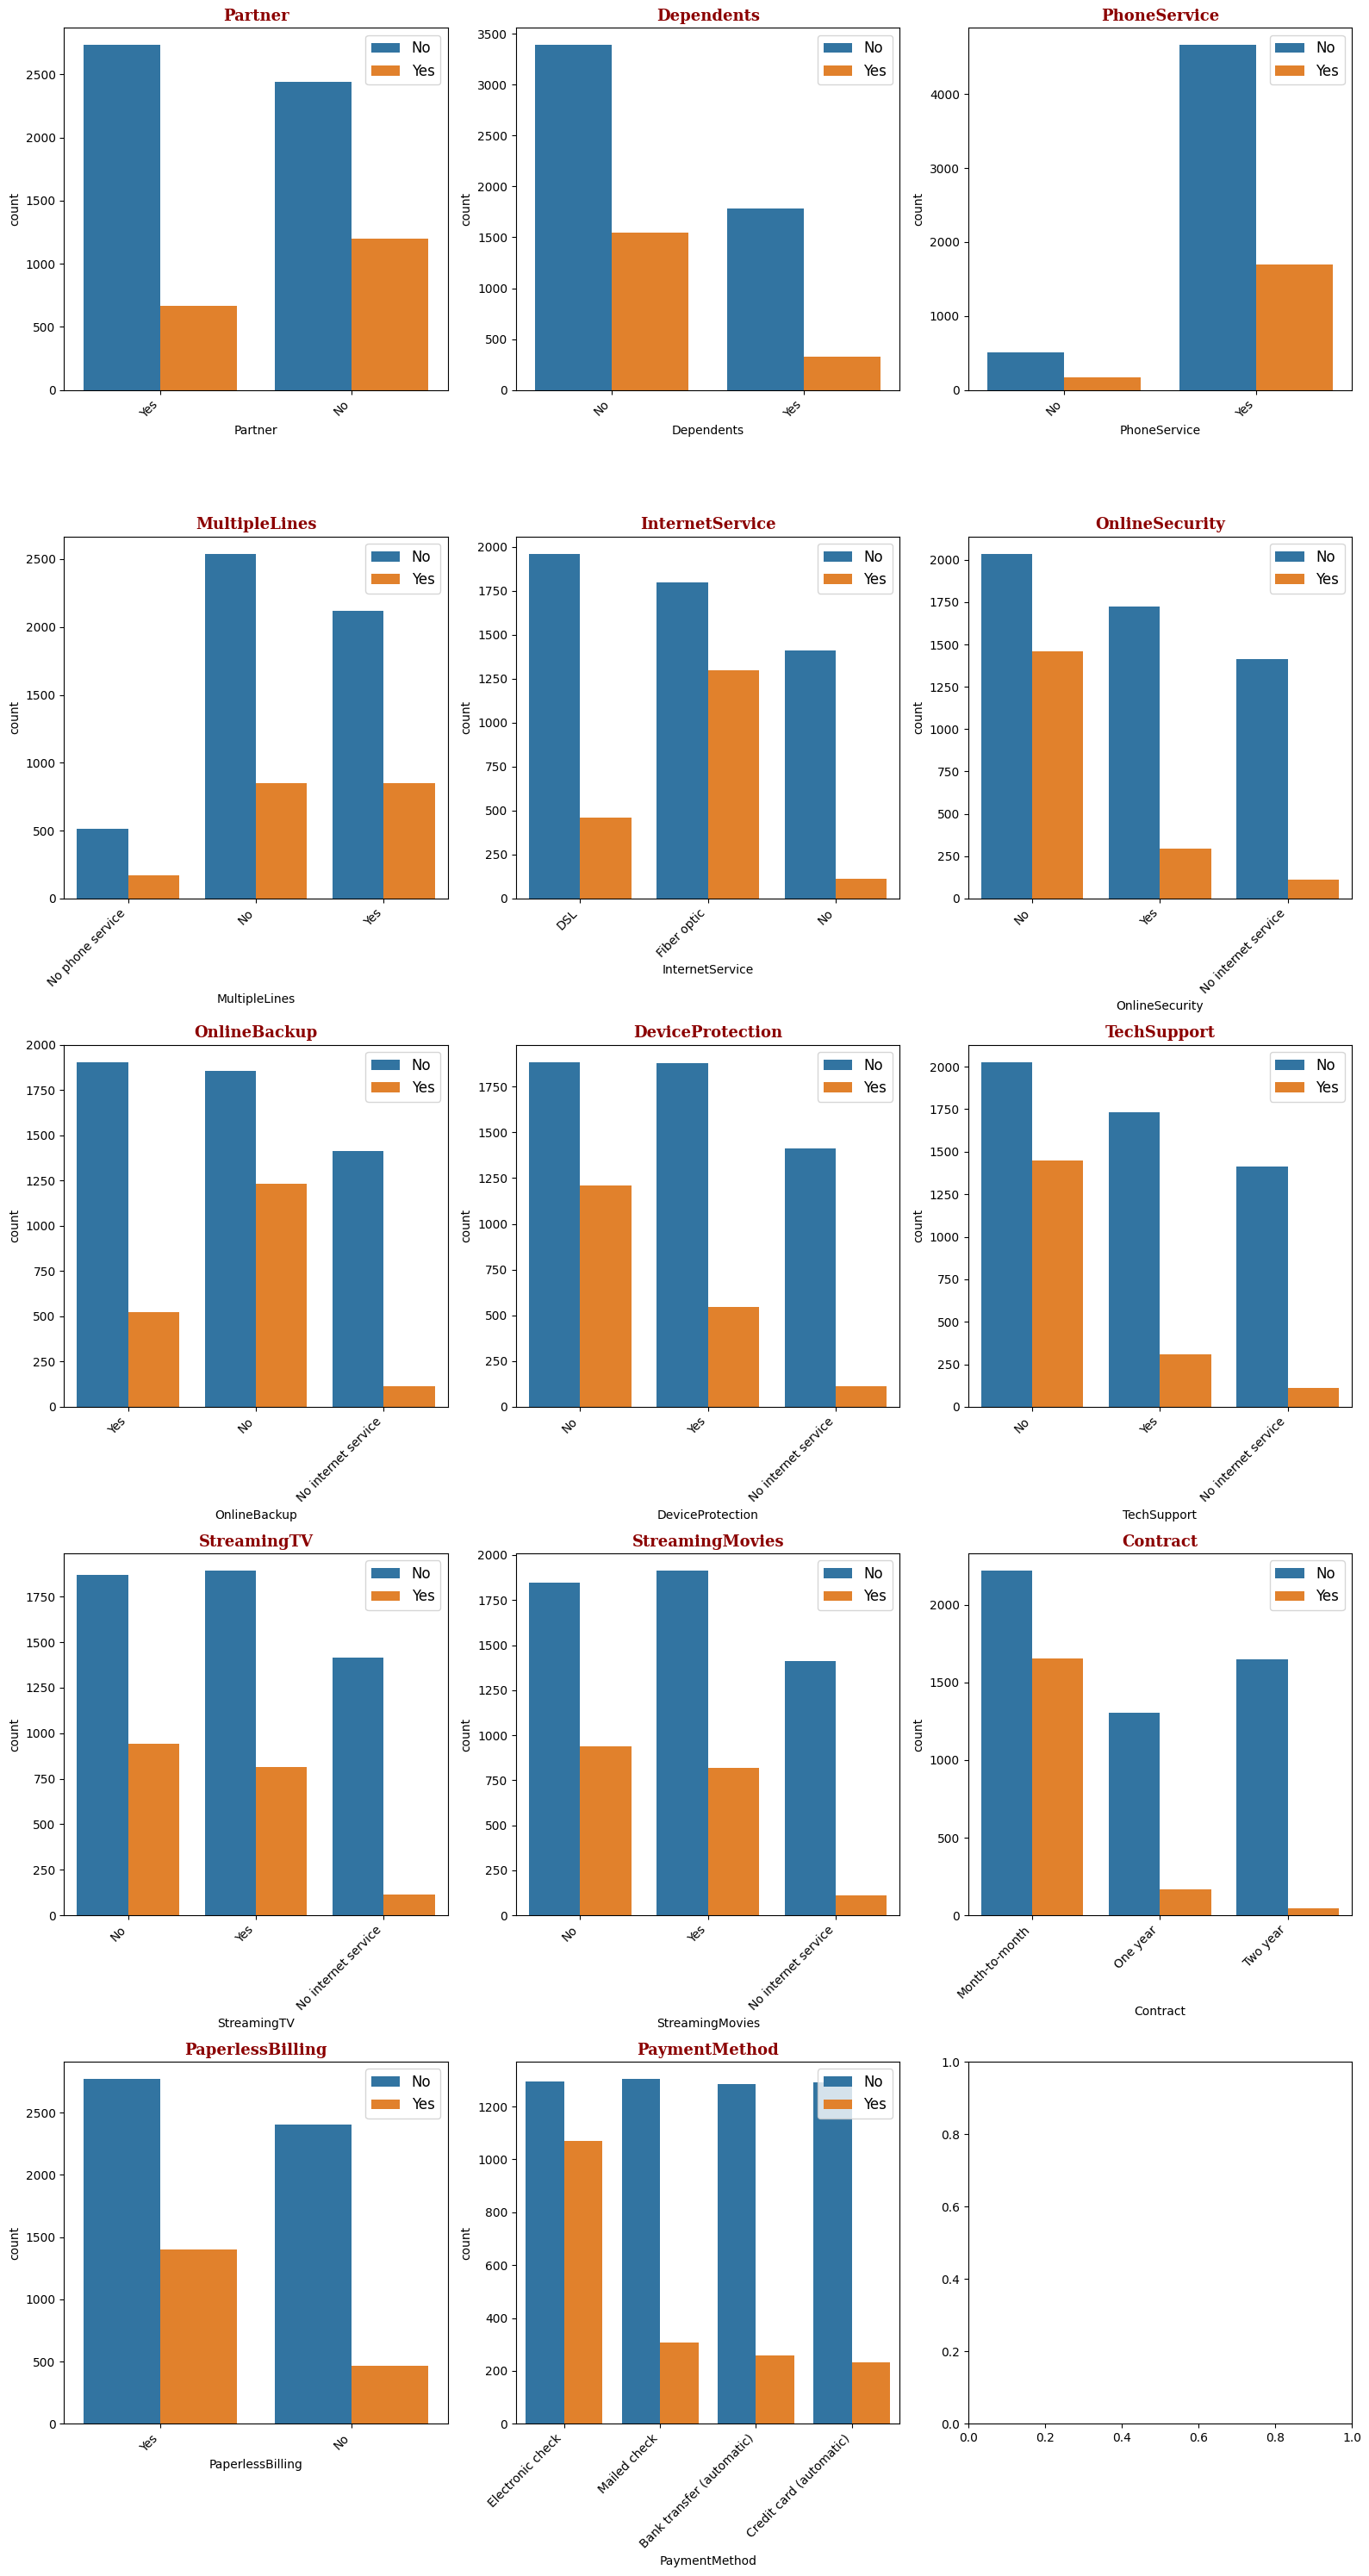

In [13]:
#For categorical columns, we will be using a countplot to visualize the distribution of the data
# Filter categorical columns
categ_columns = [col for col in selected_dataset.select_dtypes(include=['object']).columns if col not in ['customerID', 'Churn']]

# Create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 13}
axlab_dict = {'family': 'serif', 'color': 'black', 'size': 13}

# Calculate the number of rows and columns dynamically based on the number of categorical columns
num_cols = 3  # Number of columns in the grid
num_rows = (len(categ_columns) - 1) // num_cols + 1  # Calculate the number of rows needed

# Define the figsize with a larger height
fig_height = 6 * num_rows  # Adjust height based on the number of rows
fig_width = 16

# Create figure with dynamic grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=[fig_width, fig_height])
#fig.suptitle('Bivariate Analysis', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

# Loop through each categorical column and create countplots
for i, col in enumerate(categ_columns):
    row_idx = i // num_cols  # Calculate the row index
    col_idx = i % num_cols   # Calculate the column index
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]  # Handle single row case
    sns.countplot(x=selected_dataset[col], hue=selected_dataset['Churn'], ax=ax)
    ax.set_title(col, fontdict=axtitle_dict)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels if needed
    ax.legend(fontsize=12)

# Adjust spacing
fig.tight_layout()

# Show plot
plt.show()


### Creating Independent and Dependent Variables

In [14]:
X = selected_dataset.iloc[:,:-1].values
y = selected_dataset.iloc[:,-1].values


### Encoding Categorical Independent Data

In [15]:
selected_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [16]:
#print the first row in the dataset
print(selected_dataset.iloc[0])

SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

print(f'pre encoded data: {X[1]}\n') #pre encoded data

#encoding categorical columns to meaningful binary values
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,9,10,11,12,13,14,15])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
print(f'Post encoded data: {X[1]}')

pre encoded data: [0 'No' 'No' 34 'Yes' 'No' 'DSL' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'One year' 'No' 'Mailed check' 1889.5]

Post encoded data: [1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0
 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0
 0.0 0.0 1.0 0 34 1889.5]


### Encoding Categorical Dependent Variables

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(f'Post encoded target data: {y}')

Post encoded target data: [0 0 1 ... 0 1 0]


### Normalization via MinMax Scaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

n_columns = X.shape[1]
data_to_normalize = X[:, -2:]

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = min_max_scaler.fit_transform(data_to_normalize) #transforms the entire X numpy array to normalized values

minmax_X = X.copy()
minmax_X[:, -2:] = normalized_data
print(minmax_X[0])

[0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0 0.013888888888888888 0.0034370394252026537]


### Normalization via StandardScaler

In [20]:
print(X[0])

[0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0 1 29.85]


In [21]:
from sklearn.preprocessing import StandardScaler

n_columns = X.shape[1]
data_to_normalize = X[:, -2:]

standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data_to_normalize)

standardized_X = X.copy()
standardized_X[:,-2:] = standardized_data
print(standardized_X[0]) 

[0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0 -1.2774445836787776 -0.9926105235902283]


### Splitting the Dataset ot Training, Validating and Testing 

In [45]:
print(standardized_X.shape)

(7043, 42)


In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(standardized_X,y,test_size=0.3,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Handling Imbalanced Data (Optional Dataset)

<Axes: xlabel='Churn', ylabel='count'>

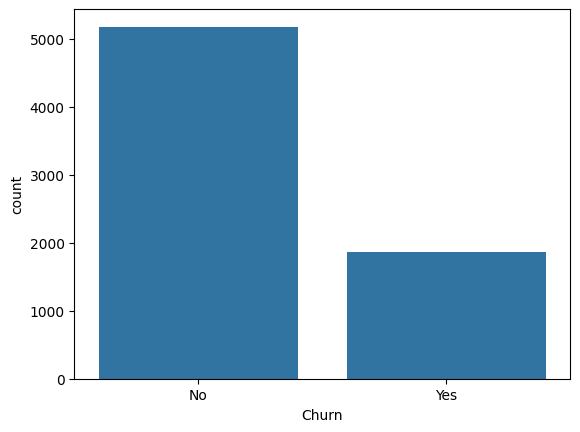

In [23]:
sns.countplot(x='Churn', data=dataset)

In [47]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0: {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1: {}'.format(sum(y_train==1)))

sm = SMOTE(sampling_strategy=1,random_state=1)
x_train_s, y_train_s = sm.fit_resample(X_train,y_train)

print("After upsampling count of label 0: {}".format(sum(y_train_s==0)))
print("After upsampling count of label 1: {}".format(sum(y_train_s==1)))

Before upsampling count of label 0: 3635
Before upsampling count of label 1: 1295
After upsampling count of label 0: 3635
After upsampling count of label 1: 3635


### Available Datasets for Predictions

In [50]:
#0.1 Total Dataset -> StandardScaler
print(standardized_X.shape)
print(y.shape)

#0.2 Total Dataset -> MinMaxScaler
print(minmax_X.shape)
print(y.shape)

#1. Training dataset
print(X_train.shape)
print(y_train.shape)

#2. Training upsampled dataset -> VIA SMOTE
print(x_train_s.shape)
print(y_train_s.shape)

#3. Validation dataset 
print(X_val.shape)
print(y_val.shape)

#4. Testing dataset
print(X_test.shape)
print(y_test.shape)

(7043, 42)
(7043,)
(7043, 42)
(7043,)
(4930, 42)
(4930,)
(7270, 42)
(7270,)
(1056, 42)
(1056,)
(1057, 42)
(1057,)


# Model Prediction Accuracy with Relevance to Training, Test and Cross-Validation

In [26]:
from sklearn.svm import SVC 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
#declaring arrays to store the results
training_accuracy = []
validation_accuracy = []
cross_validation_accuracy= []
test_accuracy = []
f1_score = []
f1_weighted = []


In [28]:
def eval_model(model, model_name,sampled=None):
        
        #training the model
        
        if(sampled!= None):
                print("Modelled via upsampled data\n")
                model.fit(x_train_s, y_train_s)
                print("Model Name: " + model_name + "\n\n")
        else:
                print("Modelled via regular training data\n")
                model.fit(X_train,y_train)
                print("Model Name: " + model_name + "\n\n")
        
        
        #predicting the training values
        y_train_pred = model.predict(X_train)
        training_score = accuracy_score(y_train, y_train_pred)
        print(f"The training score of the model is: {training_score * 100:.2f}%")
        training_accuracy.append(training_score * 100)
    
        #predicting the validation set
        y_val_pred = model.predict(X_val)
        val_score = accuracy_score(y_val, y_val_pred)
        print(f"The validation score of the model is: {val_score * 100:.2f}%")
        validation_accuracy.append(val_score * 100)
        
        #predicting the test set
        y_test_pred = model.predict(X_test)
        test_score = accuracy_score(y_test, y_test_pred)
        print(f"The test score of the model is: {test_score * 100:.2f}%")
        test_accuracy.append(test_score * 100)
        
        #based on cross validation
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
        cross_validate_results = cross_validate(model, standardized_X, y, cv=kfold, scoring=['accuracy'])
        mean_accuracy = cross_validate_results['test_accuracy'].mean()
        std_dev = cross_validate_results['test_accuracy'].std()
        print(f"The mean test accuracy of the model is: {mean_accuracy * 100:.2f}% ± {std_dev:4f}")
        cross_validation_accuracy.append(mean_accuracy * 100)
        
        #F1/ Precision/ Recall Weighted and Macro Avg scores
        print("\nClassification Report based on test set predictions")
        report = classification_report(y_test, y_test_pred, output_dict=True)
        
        f1_score_0 = report['0']['f1-score']
        f1_score_1 = report['1']['f1-score']
        weighed_average= report['weighted avg']['f1-score']
        
        f1_weighted.append(weighed_average)
        f1_score.append([f1_score_0, f1_score_1])
        
        print('\n{}'.format(classification_report(y_test, y_test_pred)))
        
        #confusion matrix
        print("Confusion Matrix: \n")
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    

Modelled via regular training data



Model Name: Normal SVM


The training score of the model is: 81.60%
The validation score of the model is: 80.78%
The test score of the model is: 79.75%
The mean test accuracy of the model is: 80.07% ± 0.014670

Classification Report based on test set predictions

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       761
           1       0.69      0.50      0.58       296

    accuracy                           0.80      1057
   macro avg       0.76      0.71      0.72      1057
weighted avg       0.79      0.80      0.79      1057

Confusion Matrix: 



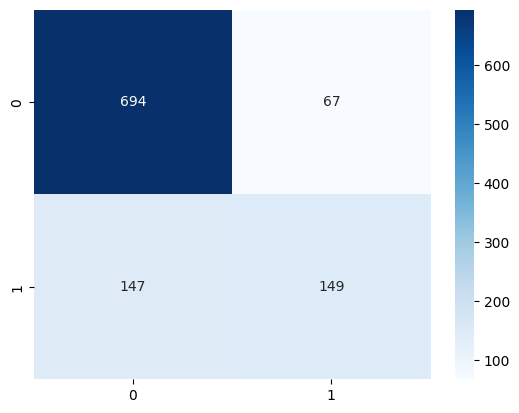

In [29]:
#Evaluation of the SVM model with hyperparameter tuning
classifier = SVC(kernel='rbf',random_state=1)
eval_model(model=classifier, model_name='Normal SVM')

Modelled via regular training data



Model Name: Hyper SVM


The training score of the model is: 80.08%
The validation score of the model is: 80.59%
The test score of the model is: 79.28%
The mean test accuracy of the model is: 79.85% ± 0.014867

Classification Report based on test set predictions

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       761
           1       0.72      0.43      0.54       296

    accuracy                           0.79      1057
   macro avg       0.76      0.68      0.70      1057
weighted avg       0.78      0.79      0.77      1057

Confusion Matrix: 



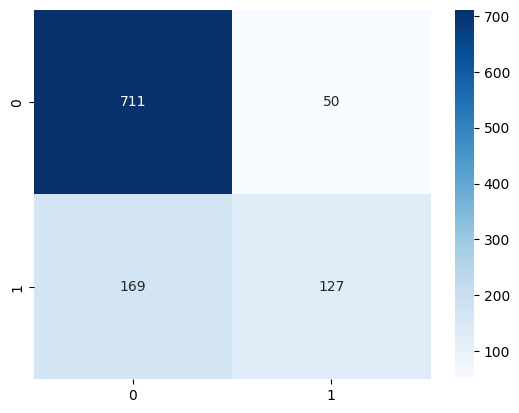

In [30]:
#Evaluation of the SVM model with hyperparameter tuning
hyper_classifier = SVC(kernel='rbf', C=0.1,gamma=0.09,random_state=1)
eval_model(model=hyper_classifier, model_name='Hyper SVM')

### Prediction via Upsampled Data

Modelled via upsampled data



Model Name: Normal sampled SVM


The training score of the model is: 79.37%
The validation score of the model is: 77.46%
The test score of the model is: 76.82%
The mean test accuracy of the model is: 80.07% ± 0.014670

Classification Report based on test set predictions

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       761
           1       0.57      0.74      0.64       296

    accuracy                           0.77      1057
   macro avg       0.73      0.76      0.74      1057
weighted avg       0.80      0.77      0.78      1057

Confusion Matrix: 



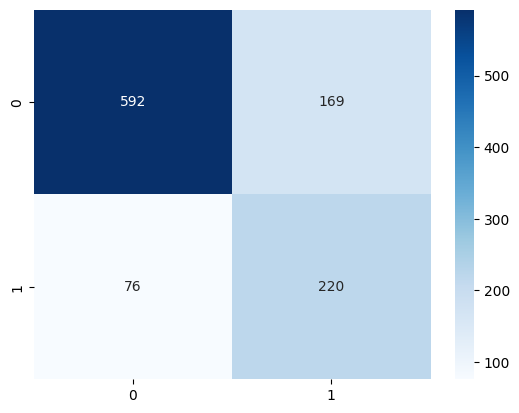

In [31]:
#Evaluation of the SVM model with no hyperparameter tuning but with upsampled data for training
eval_model(classifier,'Normal sampled SVM',sampled=True)

Modelled via upsampled data



Model Name: Hyper sampled SVM


The training score of the model is: 75.38%
The validation score of the model is: 76.52%
The test score of the model is: 75.97%
The mean test accuracy of the model is: 79.85% ± 0.014867

Classification Report based on test set predictions

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       761
           1       0.55      0.80      0.65       296

    accuracy                           0.76      1057
   macro avg       0.73      0.77      0.73      1057
weighted avg       0.81      0.76      0.77      1057

Confusion Matrix: 



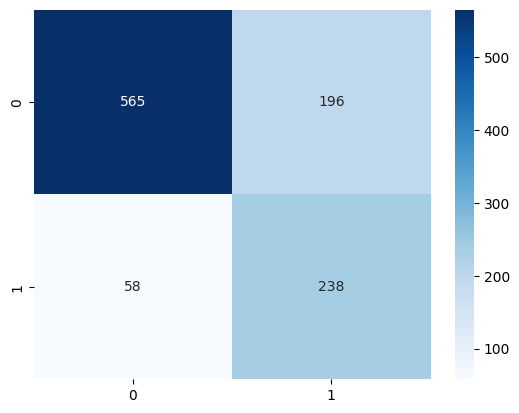

In [32]:
#Evaluation of the SVM model with hyperparameter tuning but with upsampled data for training
eval_model(hyper_classifier,'Hyper sampled SVM',sampled=True)

# Information Analysis

In [33]:
print(training_accuracy)
print(validation_accuracy)
print(test_accuracy)
print(f1_score)
print(f1_weighted)

[81.60243407707911, 80.08113590263692, 79.3711967545639, 75.37525354969574]
[80.77651515151516, 80.58712121212122, 77.46212121212122, 76.51515151515152]
[79.75402081362346, 79.28098391674551, 76.82119205298014, 75.96972563859981]
[[0.8664169787765293, 0.58203125], [0.8665447897623401, 0.5369978858350951], [0.8285514345696291, 0.6423357664233577], [0.8164739884393064, 0.6520547945205479]]
[0.7867782127236885, 0.7742591856351269, 0.7764040005381283, 0.7704303920344318]


#### Training Accuracy of Each Model

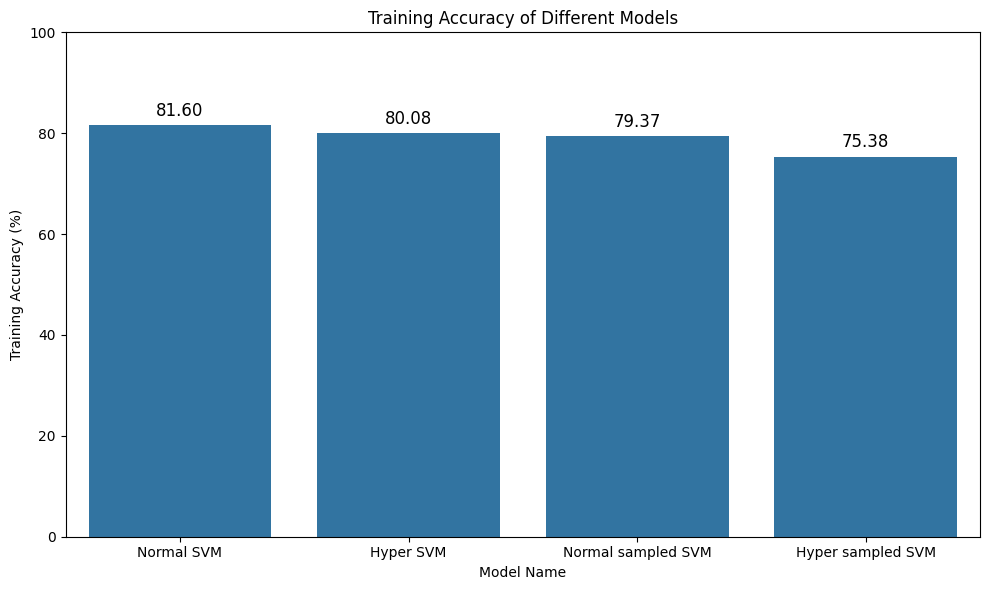

In [34]:
# Assuming training_accuracy is a list containing accuracy values for your models

# Model names
models = ['Normal SVM', 'Hyper SVM', 'Normal sampled SVM', 'Hyper sampled SVM']

# Create a DataFrame (optional, but improves organization)
data = {'Model': models, 'Accuracy': training_accuracy}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x='Model', y='Accuracy', data=df)  # Get the bar plot axes

# Loop through data and add text annotations above each bar
for i, row in df.iterrows():
    # Get bar container, bar label, and y-axis position for the current row
    bar_container = ax.containers[0]  # Assuming one container for bars
    bar_label = bar_container.patches[i]
    y_pos = bar_label.get_height()  # Get the height of the current bar

    # Add text annotation with the accuracy value above the bar with some offset
    ax.text(bar_label.get_x() + bar_label.get_width() / 2, 
            y_pos + 1,  # Adjust vertical offset as needed
            f"{row['Accuracy']:.2f}", ha='center', va='bottom', fontsize=12)  # Format accuracy and text properties

# Set labels and title
plt.xlabel("Model Name")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy of Different Models")

# Set y-axis limits (0 to 100)
plt.ylim(0, 100)  # Adjust the upper limit (100) as needed

# Rotate x-axis labels for readability if needed (optional)
# plt.xticks(rotation=45)

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

#### Test Accuracy of Each Model

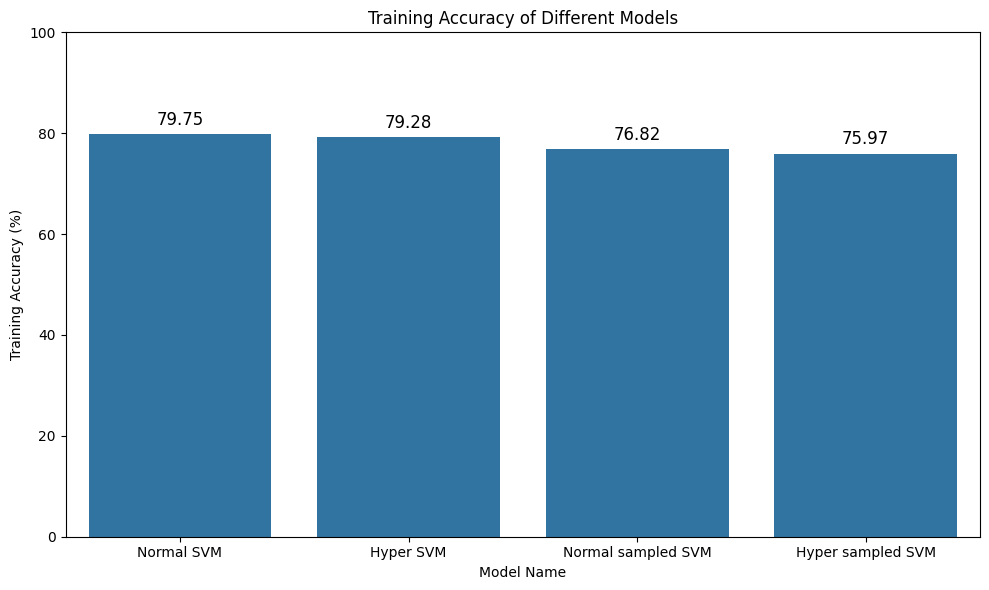

In [35]:
# Assuming training_accuracy is a list containing accuracy values for your models

# Model names
models = ['Normal SVM', 'Hyper SVM', 'Normal sampled SVM', 'Hyper sampled SVM']

# Create a DataFrame (optional, but improves organization)
data = {'Model': models, 'Accuracy': test_accuracy}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x='Model', y='Accuracy', data=df)  # Get the bar plot axes

# Loop through data and add text annotations above each bar
for i, row in df.iterrows():
    # Get bar container, bar label, and y-axis position for the current row
    bar_container = ax.containers[0]  # Assuming one container for bars
    bar_label = bar_container.patches[i]
    y_pos = bar_label.get_height()  # Get the height of the current bar

    # Add text annotation with the accuracy value above the bar with some offset
    ax.text(bar_label.get_x() + bar_label.get_width() / 2, 
            y_pos + 1,  # Adjust vertical offset as needed
            f"{row['Accuracy']:.2f}", ha='center', va='bottom', fontsize=12)  # Format accuracy and text properties

# Set labels and title
plt.xlabel("Model Name")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy of Different Models")

# Set y-axis limits (0 to 100)
plt.ylim(0, 100)  # Adjust the upper limit (100) as needed

# Rotate x-axis labels for readability if needed (optional)
# plt.xticks(rotation=45)

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

#### Cross Validation Accuracies

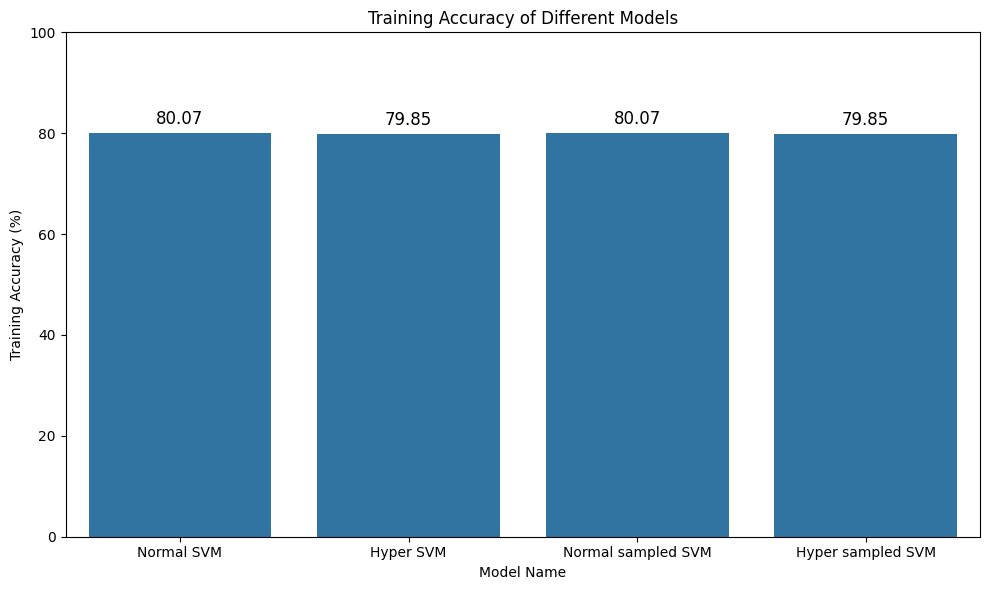

In [36]:
# Assuming training_accuracy is a list containing accuracy values for your models

# Model names
models = ['Normal SVM', 'Hyper SVM', 'Normal sampled SVM', 'Hyper sampled SVM']

# Create a DataFrame (optional, but improves organization)
data = {'Model': models, 'Accuracy': cross_validation_accuracy}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x='Model', y='Accuracy', data=df)  # Get the bar plot axes

# Loop through data and add text annotations above each bar
for i, row in df.iterrows():
    # Get bar container, bar label, and y-axis position for the current row
    bar_container = ax.containers[0]  # Assuming one container for bars
    bar_label = bar_container.patches[i]
    y_pos = bar_label.get_height()  # Get the height of the current bar

    # Add text annotation with the accuracy value above the bar with some offset
    ax.text(bar_label.get_x() + bar_label.get_width() / 2, 
            y_pos + 1,  # Adjust vertical offset as needed
            f"{row['Accuracy']:.2f}", ha='center', va='bottom', fontsize=12)  # Format accuracy and text properties

# Set labels and title
plt.xlabel("Model Name")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy of Different Models")

# Set y-axis limits (0 to 100)
plt.ylim(0, 100)  # Adjust the upper limit (100) as needed

# Rotate x-axis labels for readability if needed (optional)
# plt.xticks(rotation=45)

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

#### F1 score of each Model

<Figure size 1000x600 with 0 Axes>

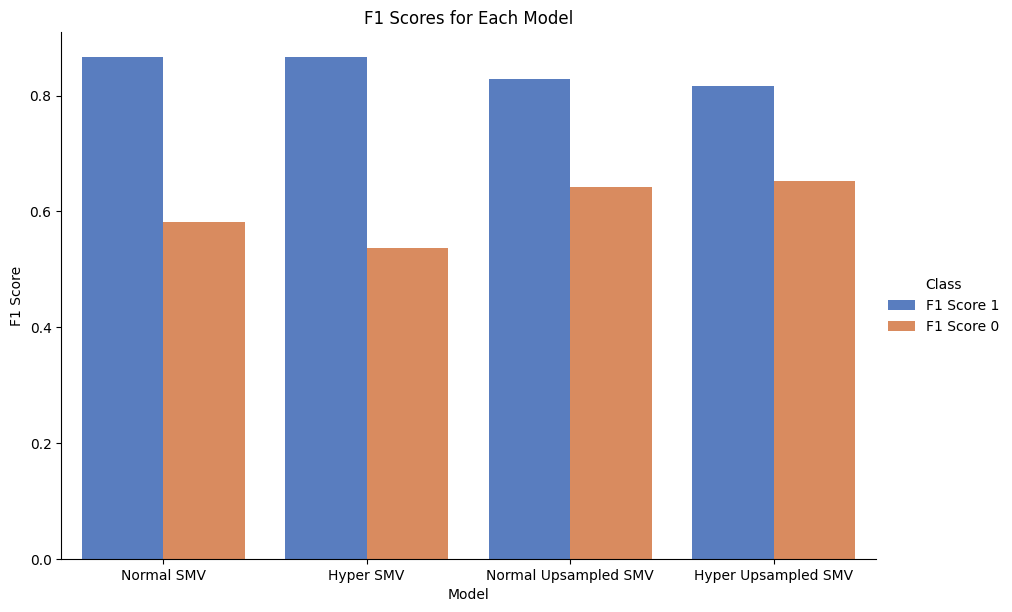

In [37]:
# Unpack F1 scores for each model (scores for class 0 and class 1)
f1_0 = [scores[0] for scores in f1_score]  # Scores for class 0 (F1 at 0)
f1_1 = [scores[1] for scores in f1_score]  # Scores for class 1 (F1 at 1)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create categories (0 or 1) from F1 scores
f1_categories = [[int(round(score)) for score in f1_score] for f1_score in f1_score]

# Convert the list of lists to a DataFrame
df = pd.DataFrame(f1_score, columns=['F1 Score 1', 'F1 Score 0'])

# Add a column for model number
df['Model'] = ['Normal SMV', 'Hyper SMV', 'Normal Upsampled SMV', 'Hyper Upsampled SMV']

# Reshape the DataFrame for seaborn's catplot
df = pd.melt(df, id_vars='Model', var_name='Class', value_name='F1_Score')

# Plot using Seaborn
sns.catplot(data=df, kind='bar', x='Model', y='F1_Score', hue='Class', palette='muted', height=6, aspect=1.5)
plt.title('F1 Scores for Each Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

#### Weighted Average F1 Scores of All Models

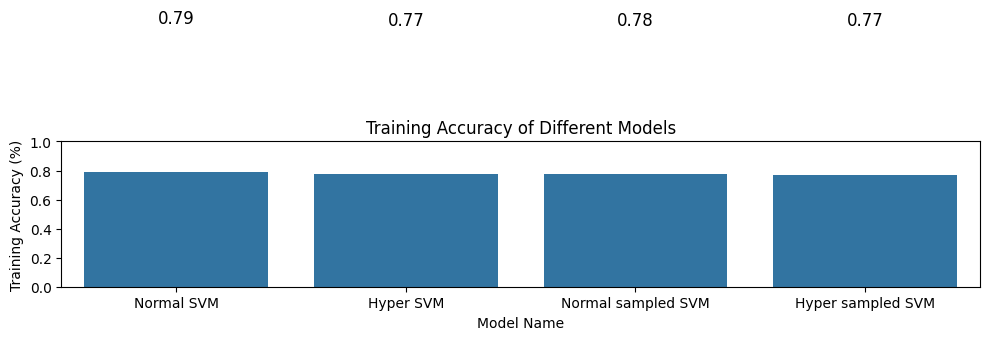

In [38]:
# Assuming training_accuracy is a list containing accuracy values for your models

# Model names
models = ['Normal SVM', 'Hyper SVM', 'Normal sampled SVM', 'Hyper sampled SVM']

# Create a DataFrame (optional, but improves organization)
data = {'Model': models, 'Accuracy': f1_weighted}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x='Model', y='Accuracy', data=df)  # Get the bar plot axes

# Loop through data and add text annotations above each bar
for i, row in df.iterrows():
    # Get bar container, bar label, and y-axis position for the current row
    bar_container = ax.containers[0]  # Assuming one container for bars
    bar_label = bar_container.patches[i]
    y_pos = bar_label.get_height()  # Get the height of the current bar

    # Add text annotation with the accuracy value above the bar with some offset
    ax.text(bar_label.get_x() + bar_label.get_width() / 2, 
            y_pos + 1,  # Adjust vertical offset as needed
            f"{row['Accuracy']:.2f}", ha='center', va='bottom', fontsize=12)  # Format accuracy and text properties

# Set labels and title
plt.xlabel("Model Name")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy of Different Models")

# Set y-axis limits (0 to 100)
plt.ylim(0, 1)  # Adjust the upper limit (1) as needed

# Rotate x-axis labels for readability if needed (optional)

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

### Extra: Polynomial Kernel SVM Model Prediction Accuracy

Modelled via regular training data

Model Name: Normal Poly SVM


The training score of the model is: 81.89%
The validation score of the model is: 80.78%
The test score of the model is: 78.90%
The mean test accuracy of the model is: 79.91% ± 0.016036

Classification Report based on test set predictions

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       761
           1       0.67      0.49      0.57       296

    accuracy                           0.79      1057
   macro avg       0.74      0.70      0.71      1057
weighted avg       0.78      0.79      0.78      1057

Confusion Matrix: 



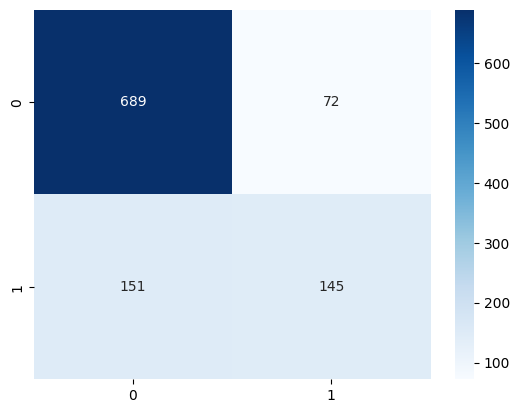

In [39]:
poly_class = SVC(kernel='poly',random_state=1)
eval_model(model=poly_class, model_name='Normal Poly SVM')

Modelled via upsampled data



Model Name: Poly SVM


The training score of the model is: 79.29%
The validation score of the model is: 75.19%
The test score of the model is: 74.65%
The mean test accuracy of the model is: 79.91% ± 0.016036

Classification Report based on test set predictions

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       761
           1       0.53      0.76      0.63       296

    accuracy                           0.75      1057
   macro avg       0.71      0.75      0.72      1057
weighted avg       0.79      0.75      0.76      1057

Confusion Matrix: 



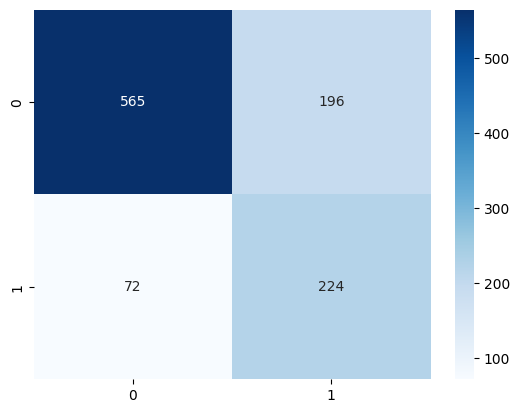

In [40]:
poly_classifier = SVC(kernel='poly',random_state=1)
eval_model(poly_classifier,'Poly SVM',sampled=True)
